In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from dateutil.parser import parse

In [87]:
mydf = pd.read_csv('teleco_time_series .csv')

In [88]:
mydf

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554
...,...,...
726,727,16.931559
727,728,17.490666
728,729,16.803638
729,730,16.194813


In [89]:
mydf.set_index('Day',inplace=True)

In [91]:
mydf.index=pd.to_datetime(mydf.index, unit = 'D', origin = '2015-01-01')

In [92]:
mydf.dropna(inplace=True)

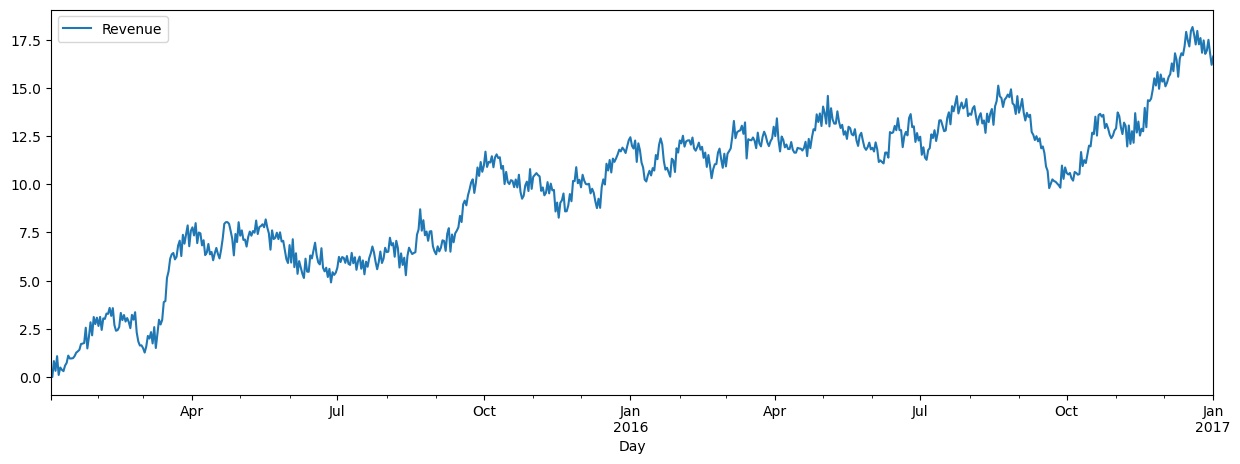

In [93]:
# lets plot the time series
mydf.plot(figsize=(15, 5))
plt.show()

In [94]:
# Lets create the testing Stationarity
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
mydftest = adfuller(mydf['Revenue'],autolag='AIC')
mydfoutput=pd.Series(mydftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    mydfoutput['critical value (%s)'%key]= value
print(mydfoutput)

Observations of Dickey-fuller test
Test Statistic                  -1.924612
p-value                          0.320573
#lags used                       1.000000
number of observations used    729.000000
critical value (1%)             -3.439352
critical value (5%)             -2.865513
critical value (10%)            -2.568886
dtype: float64


In [95]:
mydf_stationary = df.diff().dropna()

In [96]:
mydf_stationary

,Revenue
Day,
2015-01-03,0.000793
2015-01-04,0.824749
2015-01-05,-0.505210
2015-01-06,0.762222
2015-01-07,-0.974900
...,...
2016-12-28,0.170280
2016-12-29,0.559108
2016-12-30,-0.687028


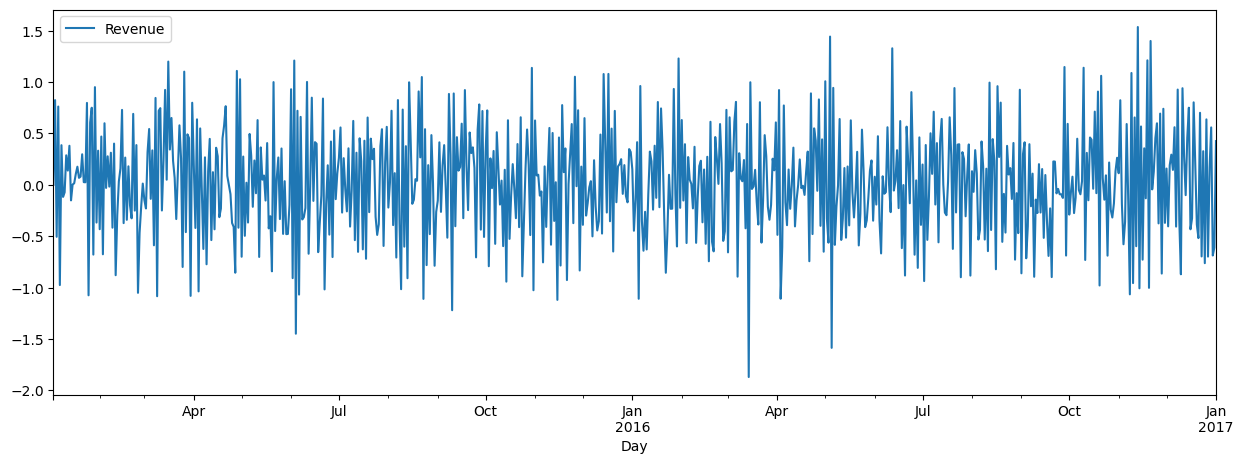

In [97]:
#plot
mydf_stationary.plot(figsize=(15, 5))
plt.show()

In [98]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
mydftest = adfuller(mydf_stationary['Revenue'],autolag='AIC')
mydfoutput=pd.Series(mydftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in mydftest[4].items():
    mydfoutput['critical value (%s)'%key]= value
print(mydfoutput)

Observations of Dickey-fuller test
Test Statistic                 -44.874527
p-value                          0.000000
#lags used                       0.000000
number of observations used    729.000000
critical value (1%)             -3.439352
critical value (5%)             -2.865513
critical value (10%)            -2.568886
dtype: float64


In [99]:
mydf_stationary.isna().any()

Revenue    False
dtype: bool

In [100]:
mydf_stationary.duplicated().any()

False

In [101]:
mydf_train = mydf_stationary.iloc[:364]
mydf_train

,Revenue
Day,
2015-01-03,0.000793
2015-01-04,0.824749
2015-01-05,-0.505210
2015-01-06,0.762222
2015-01-07,-0.974900
...,...
2015-12-28,-0.107863
2015-12-29,-0.169725
2015-12-30,0.348312


In [102]:

mydf_test = mydf_stationary.iloc[365:]
mydf_test

,Revenue
Day,
2016-01-03,-0.141204
2016-01-04,0.415539
2016-01-05,-1.108194
2016-01-06,0.961947
2016-01-07,-0.351247
...,...
2016-12-28,0.170280
2016-12-29,0.559108
2016-12-30,-0.687028


In [103]:
mydf_stationary.to_csv('d213task1cleaned_data.csv', index = False)

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df_stationary['Revenue'],  model='additive', period=1)

<AxesSubplot:xlabel='Day'>

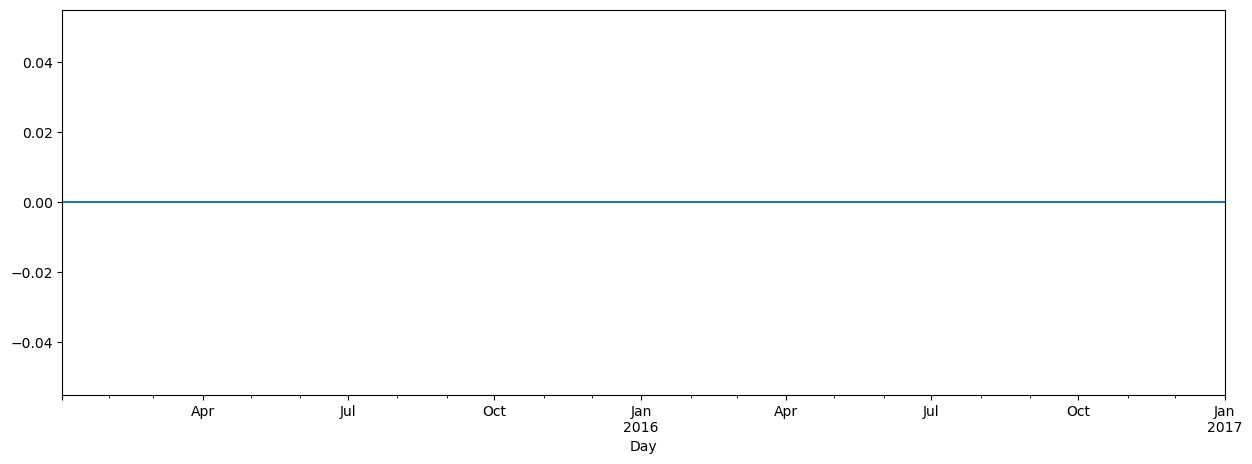

In [104]:
result.seasonal.plot(figsize=(15, 5))

<AxesSubplot:xlabel='Day'>

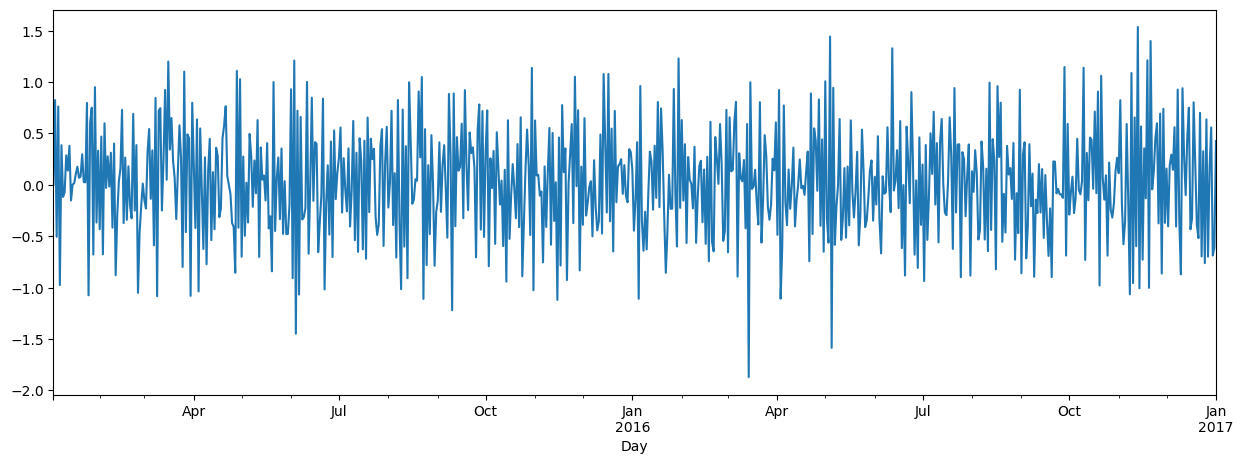

In [50]:
result.trend.plot(figsize=(15, 5))

In [106]:
mydfroll = mydf_stationary.copy()

In [107]:

mydfroll[ '7day_rolling_avg' ] = mydfroll.Revenue.rolling( 7).mean()

Text(0.5, 0, 'Day')

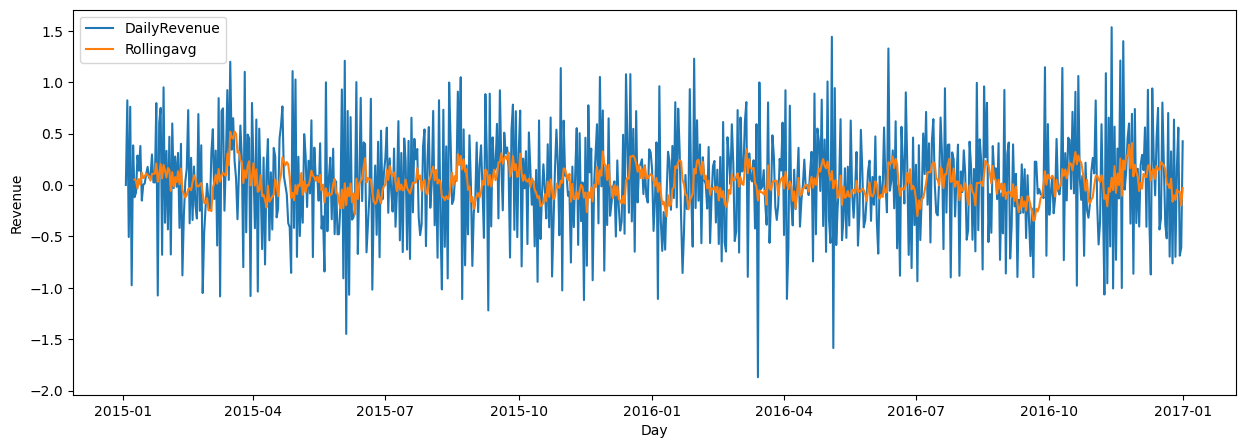

In [108]:
plt.figure( figsize = ( 15, 5))
  

sns.lineplot( x = 'Day',
             y = 'Revenue',
             data = mydfroll,
             label = 'DailyRevenue')
  

sns.lineplot( x = 'Day',
             y = '7day_rolling_avg',
             data = mydfroll,
             label = 'Rollingavg')
  
plt.xlabel('Day')

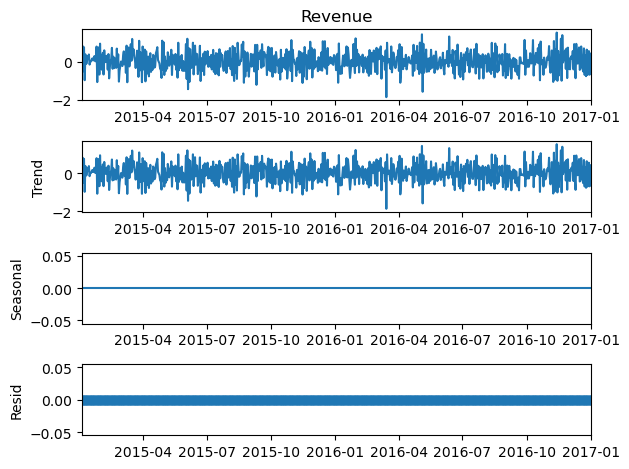

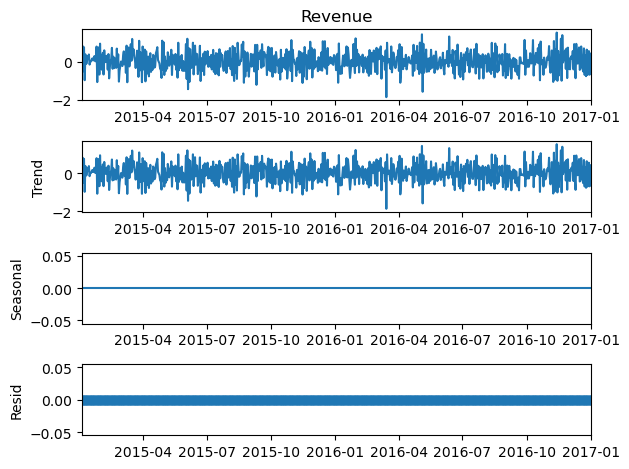

In [109]:
# lets illustrate the Time Series Decomposed
result.plot()

In [110]:
from statsmodels.graphics.tsaplots import plot_acf

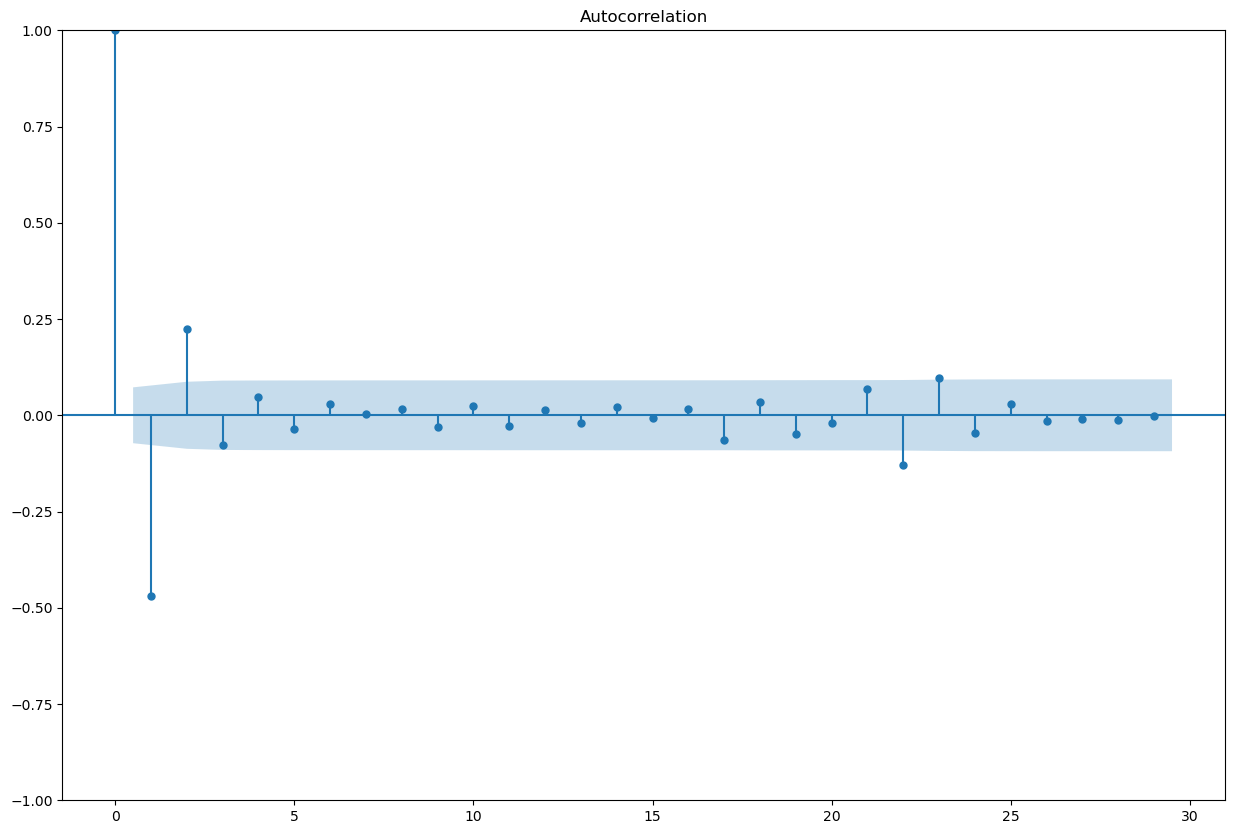

In [111]:
fig = plot_acf(mydf_stationary)
fig.set_size_inches(15, 10)
plt.show(fig)

In [112]:
from statsmodels.graphics.tsaplots import plot_pacf

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


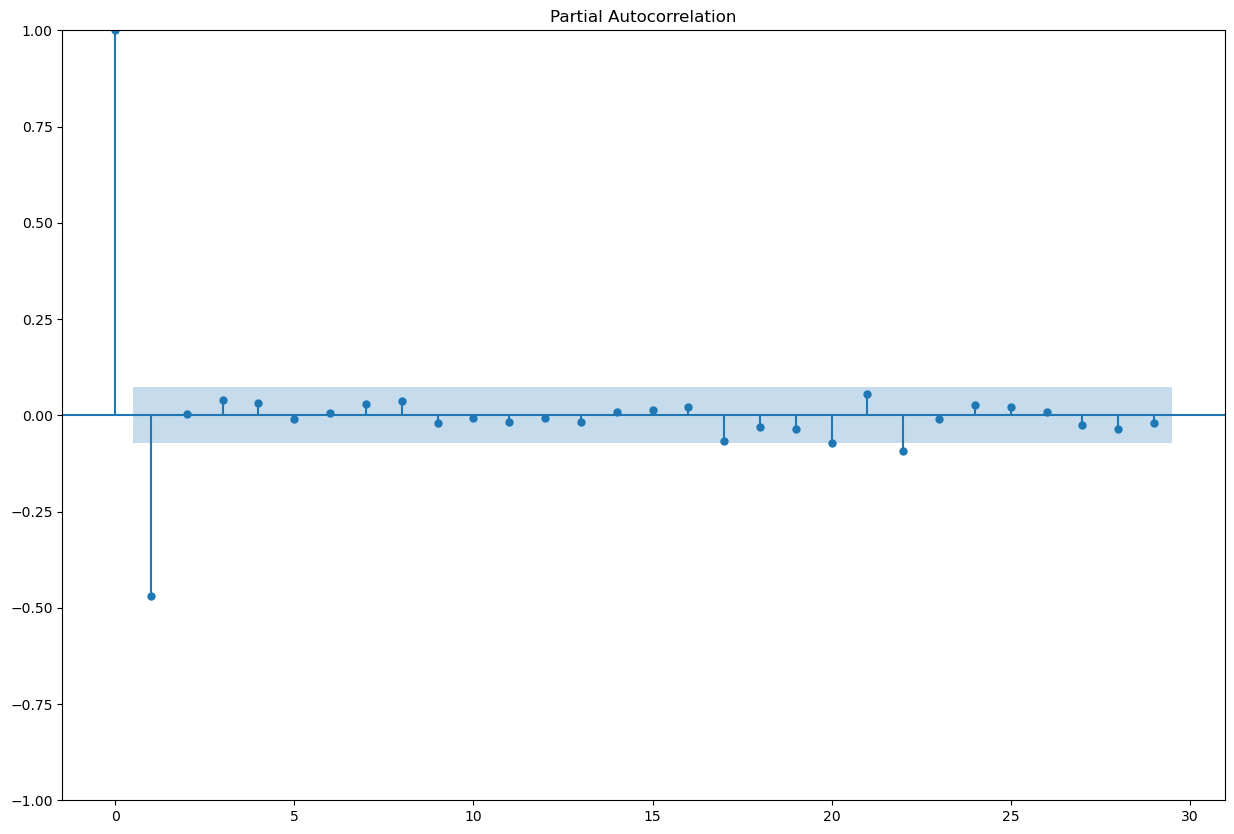

In [113]:
fig = plot_pacf(mydf_stationary)
fig.set_size_inches(15, 10)
plt.show(fig)

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  730
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -545.622
Date:                Sun, 27 Nov 2022   AIC                           1103.243
Time:                        01:26:44   BIC                           1130.793
Sample:                    01-03-2015   HQIC                          1113.873
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2947      0.036    -35.703      0.000      -1.366      -1.224
ar.L2         -1.0175      0.057    -17.802      0.000      -1.130      -0.906
ar.L3         -0.7079      0.065    -10.935      0.0

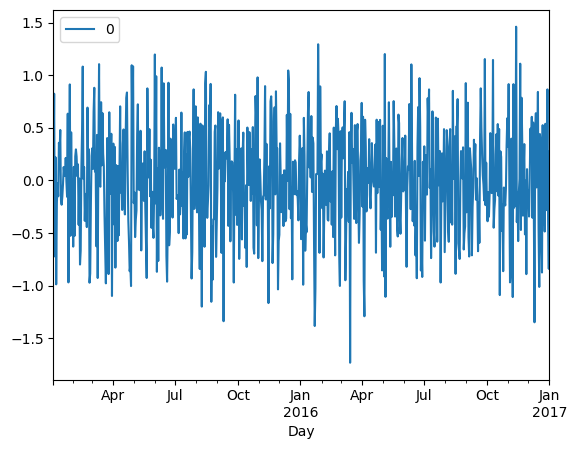

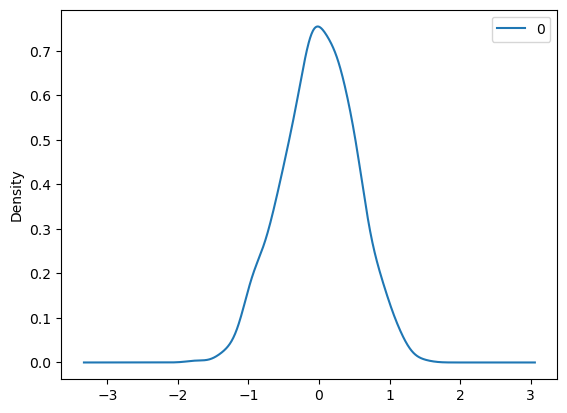

                0
count  730.000000
mean    -0.002052
std      0.511771
min     -1.734058
25%     -0.354040
50%      0.007621
75%      0.347918
max      1.460947


In [114]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

mydf_stationary.index = mydf_stationary.index.to_period('D')
model = ARIMA(mydf_stationary, order=(5,1,0), freq = "D")
model_fit = model.fit()

print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

print(residuals.describe())

In [115]:
from sklearn.metrics import mean_squared_error
from math import sqrt
X = mydf_stationary.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=0.073678, expected=-0.398402
predicted=0.493211, expected=0.442802
predicted=0.200065, expected=-0.650088
predicted=0.451605, expected=1.008159
predicted=-0.255253, expected=-0.324824
predicted=0.365546, expected=-0.562324
predicted=0.244546, expected=1.442980
predicted=-0.513372, expected=-1.585790
predicted=0.776759, expected=0.943729
predicted=-0.338858, expected=-0.583497
predicted=0.106102, expected=-0.212997
predicted=0.062260, expected=-0.003891
predicted=-0.167196, expected=0.640939
predicted=-0.455344, expected=-0.535783
predicted=0.334733, expected=-0.329183
predicted=-0.013814, expected=0.163790
predicted=-0.205994, expected=-0.513667
predicted=0.112459, expected=0.178902
predicted=-0.253228, expected=-0.394099
predicted=-0.128893, expected=0.628061
predicted=-0.390155, expected=-0.071771
predicted=0.037969, expected=-0.317071
predicted=0.135298, expected=-0.057014
predicted=-0.015031, expected=0.321697
predicted=-0.150852, expected=-0.589136
predicted=0.264832, ex

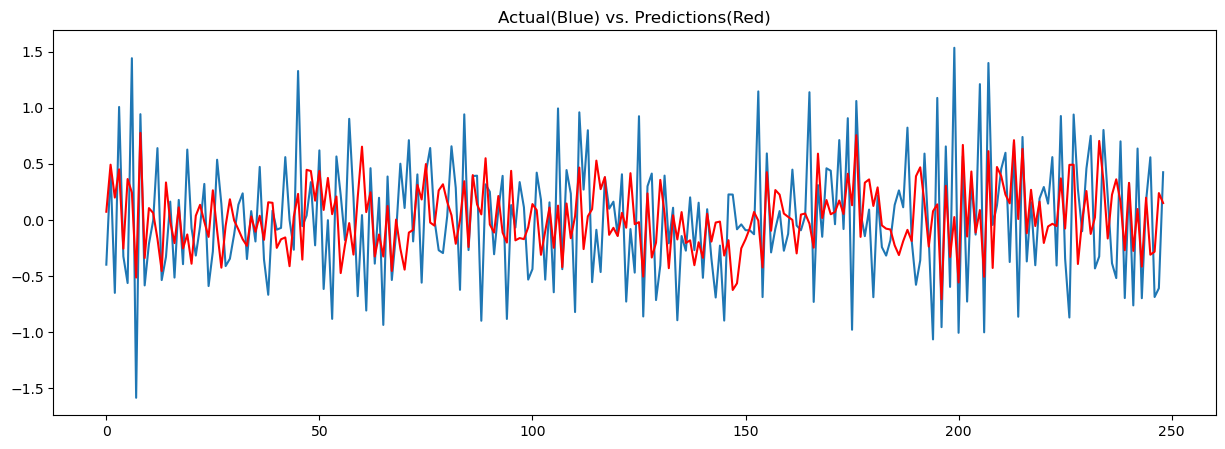

In [116]:
plt.figure(figsize=(15,5))
plt.title('Actual(Blue) vs. Predictions(Red)')
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()